# Linear Regression

### CarPrice Assignmment

Problem Statement : A Chinese automobile company Geely Auto aspires to enter the US market.They want to understand,factors on which car price depends.Specifically, they want to understand the factors affecting the pricing of cars in the American market.




# Step 1 : Reading and understanding data

In [1]:
# importing libraries required
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
pd.set_option('display.max_columns',80)

In [2]:
# update the path for CarPrice_Assignment.csv as required

CarPrice_df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
# Check the head of the dataset
CarPrice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
CarPrice_df.shape

(205, 26)

In [5]:
CarPrice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
CarPrice_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Let's do some data cleaning before moving forward

In [7]:
# Extract car name only from CarName field which contain car model as well

CarPrice_df['CarName'] = CarPrice_df['CarName'].apply(lambda x : x.split(" ")[0])

In [8]:
# all lower case
CarPrice_df['CarName'] = CarPrice_df['CarName'].apply(lambda x : x.lower())

In [9]:
# replace some incorrect car names
def correctwords(x):
    if x == 'toyouta':
        return "toyota"
    elif x == "vw" or x == "vokswagen" :
        return "volkswagen"
    return x
CarPrice_df['CarName'] = CarPrice_df['CarName'].apply(correctwords)

In [10]:
# converting categorical col type to str
CarPrice_df['symboling'] = CarPrice_df['symboling'].astype('str')

In [11]:
# drop car_ID as it is just a sequential number given to rows in data
CarPrice_df.drop(['car_ID'],axis = 1,inplace= True)

In [12]:
CarPrice_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Step 2 : Visualising the data

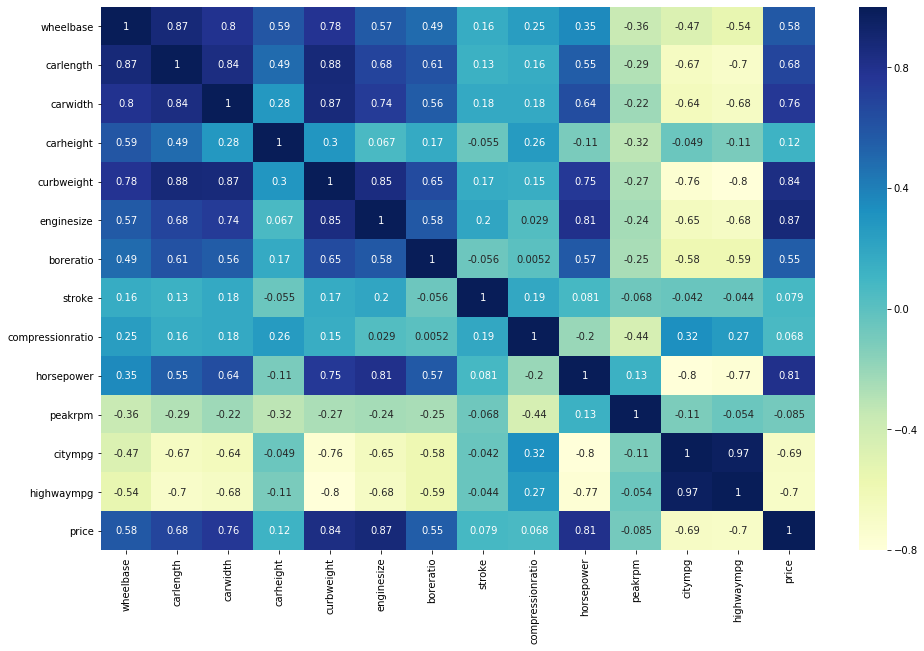

In [13]:
# visualising numerical fields
plt.figure(figsize = (16, 10))
sns.heatmap(CarPrice_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

There are many fields with high correlation.So we need to keep an eye while building a model.

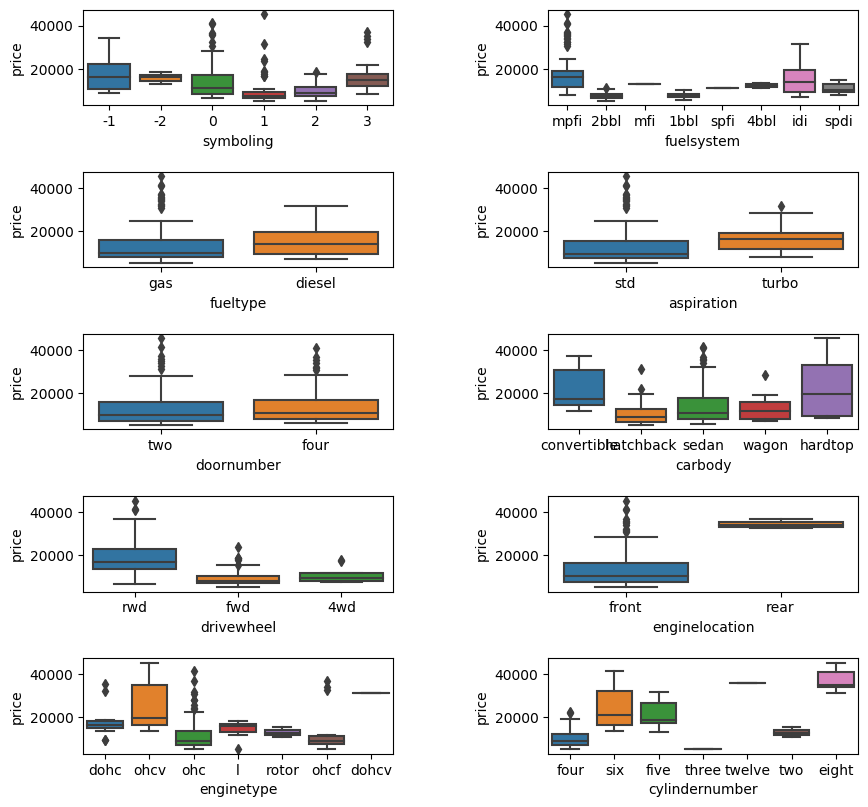

In [14]:
#Visualising Categorical Variables

plt.figure(figsize=(10, 12),dpi = 100)
plt.subplots_adjust(hspace = 0.7,wspace = 0.5)
plt.subplot(6,2,1)
sns.boxplot(x = 'symboling', y = 'price', data = CarPrice_df)
plt.subplot(6,2,2)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice_df)
plt.subplot(6,2,3)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice_df)
plt.subplot(6,2,4)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice_df)
plt.subplot(6,2,5)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice_df)
plt.subplot(6,2,6)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice_df)
plt.subplot(6,2,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice_df)
plt.subplot(6,2,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice_df)
plt.subplot(6,2,9)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice_df)
plt.subplot(6,2,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice_df)

plt.show()

1. If we notice in above graphs, few categorical fields have 2 categorical values and few have more than that.<br>
2. Also, few fileds do have outliers.<br>

Lets update categorical columns have 2 categorical values to binary numbers as below

### Step 3 : Data preparation

In [15]:
# List of variables to map where only two categorical values are present

varlist =  ['fueltype', 'aspiration', 'doornumber', 'enginelocation']

# Defining the map function
def binary_map(x):
    return x.map({'gas': 1, "diesel": 0,'std': 1, "turbo": 0,'two': 1, "four": 0,'front': 1, "rear": 0})

# Applying the function to the housing list
CarPrice_df[varlist] = CarPrice_df[varlist].apply(binary_map)

In [16]:
CarPrice_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,1,1,0,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,1,1,0,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


For remaining categorical columns where categorical values are more than 2, will use inbuilt function get_dummies

In [17]:
# Get the dummy variables for the feature 

varlist = ['symboling','CarName','carbody','drivewheel','enginetype','cylindernumber','fuelsystem']
dummy_df = pd.get_dummies(CarPrice_df[varlist], drop_first = True)

In [18]:
dummy_df.head()

,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_maxda,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porcshce,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
# Add the results to the original CarPrice_df dataframe

CarPrice_df = pd.concat([CarPrice_df, dummy_df], axis = 1)

In [20]:
# Drop columns for which we have created the dummies 

CarPrice_df.drop(varlist, axis = 1, inplace = True)

In [21]:
CarPrice_df.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_maxda,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porcshce,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.902439,0.819512,0.439024,0.985366,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.014634,0.326829,0.263415,0.156098,0.131707,0.034146,0.039024,0.039024,0.014634,0.043902,0.063415,0.019512,0.014634,0.009756,0.073171,0.004878,0.063415,0.087805,0.053659,0.034146,0.004878,0.019512,0.009756,0.029268,0.058537,0.156098,0.058537,0.053659,0.039024,0.341463,0.468293,0.121951,0.585366,0.370732,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,0.297446,0.385535,0.497483,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.120377,0.470202,0.441564,0.363836,0.339000,0.182050,0.194127,0.194127,0.120377,0.205380,0.244304,0.138655,0.120377,0.098531,0.261054,0.069843,0.244304,0.283704,0.225894,0.182050,0.069843,0.138655,0.098531,0.168970,0.235330,0.363836,0.235330,0.225894,0.194127,0.475361,0.500215,0.328031,0.493865,0.484183,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000,0.000000,0.000000,0.000000

### Step 4: Splitting the Data into Training and Testing Sets

In [22]:
# split the data into train and test dataset
np.random.seed(0)
df_train, df_test = train_test_split(CarPrice_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
df_train.shape

(143, 71)

In [24]:
df_test.shape

(62, 71)

#### Rescale train data using Min-Max scaling 

In [25]:
scaler = MinMaxScaler()

In [26]:
# Apply scaler() to all the columns except the 'categorical' and 'dummy' variables.Only Numerical columns.

num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_maxda,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porcshce,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.909091,0.818182,0.440559,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.013986,0.349650,0.300699,0.118881,0.125874,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.013986,0.076923,0.0,0.062937,0.097902,0.055944,0.027972,0.0,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.117845,0.478536,0.460174,0.324786,0.332873,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.117845,0.267406,0.0,0.243703,0.298227,0.230621,0.165472,0.0,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00

### Step 5 : Dividing into X and Y sets for the model building

In [28]:
# Considering train dataset for model building
# Consider only independent variable for X train and price would be for y train
y_train = df_train.pop('price')
X_train = df_train

### Step 6 : Building Model

In [29]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE to select top 15 columns
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 24),
 ('aspiration', False, 19),
 ('doornumber', False, 47),
 ('enginelocation', True, 1),
 ('wheelbase', False, 18),
 ('carlength', False, 22),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 25),
 ('horsepower', False, 32),
 ('peakrpm', False, 13),
 ('citympg', False, 44),
 ('highwaympg', False, 17),
 ('symboling_-2', False, 3),
 ('symboling_0', False, 42),
 ('symboling_1', False, 41),
 ('symboling_2', False, 40),
 ('symboling_3', False, 36),
 ('CarName_audi', False, 8),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 7),
 ('CarName_chevrolet', False, 21),
 ('CarName_dodge', False, 16),
 ('CarName_honda', False, 15),
 ('CarName_isuzu', False, 45),
 ('CarName_jaguar', False, 30),
 ('CarName_maxda', False, 46),
 ('CarName_mazda', False, 37),
 ('CarName_mercury', False, 53),
 ('CarName_mitsubishi', False, 11),
 ('CarName_nissan', Fa

In [32]:
# Top 15 columns which are most signifant using RFE are as below 
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'CarName_bmw', 'CarName_peugeot', 'CarName_porsche',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'symboling_-2', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'CarName_audi', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_maxda', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_plymouth',
       'CarName_porcshce', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_m

### Building model using statsmodel, for the detailed statistics

In [34]:
# Model 1 :
#Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [35]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [36]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [37]:
#Let's see the summary of first linear model built
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.03e-70
Time:                        16:22:21   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

Considering high value for R2, and warning we have got, there are riables with high multicollinearity. Lets check that using heat map and VIF values

In [38]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [39]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype_rotor,inf
14,cylindernumber_two,inf
3,enginesize,85.16
0,enginelocation,59.04
2,curbweight,54.19
11,cylindernumber_four,46.19
1,carwidth,42.69
4,boreratio,37.59
5,stroke,30.79
13,cylindernumber_twelve,2.92


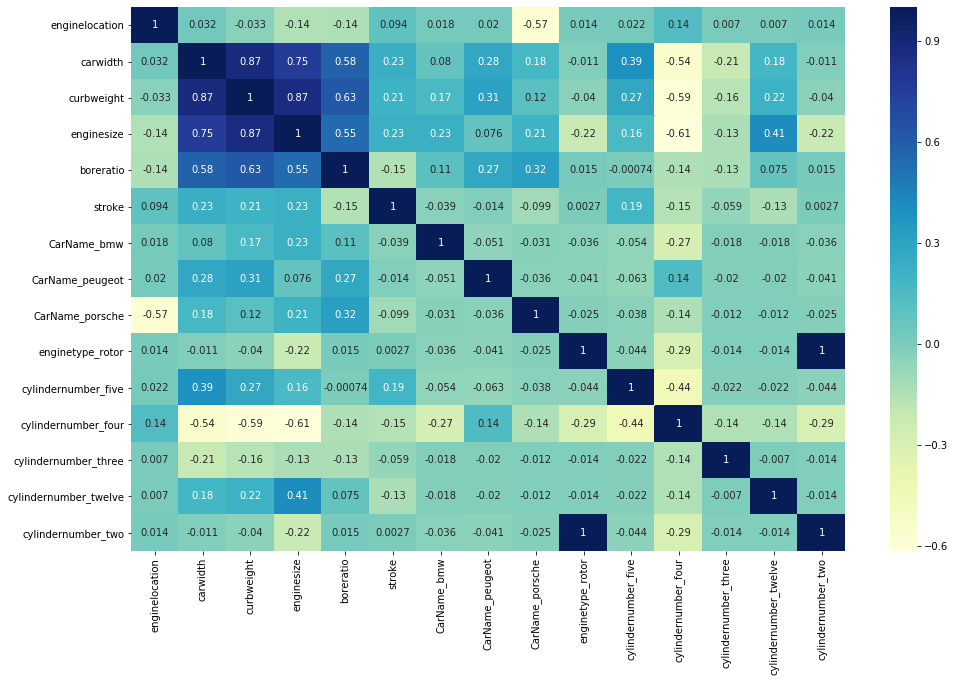

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

enginetype_rotor and cylindernumber_two are highlily corelated with corelation value as 1. Hence removing cylindernumber_two from the model

In [41]:
#Model 2 : 
X_train_new = X_train_new.drop(["cylindernumber_two"], axis = 1)

In [42]:
#Rebuilding the model without cylindernumber_two

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.03e-70
Time:                        16:22:23   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

In [43]:
# check VIF again
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,85.16
0,enginelocation,59.04
2,curbweight,54.19
11,cylindernumber_four,46.19
1,carwidth,42.69
4,boreratio,37.59
5,stroke,30.79
9,enginetype_rotor,5.09
13,cylindernumber_twelve,2.92
10,cylindernumber_five,2.84


Now we can see enginetype_rotor col have much less VIF compred to previous one.<br>
Now lets remove few more features with high collinearity.

In [44]:
#Model 3 :

# carwidth and curbweight high corr value of 0.87. Lets remove curbweight

# drop feature
X_train_new = X_train_new.drop(["curbweight"], axis = 1)


#Rebuilding the model without cylindernumber_two

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     126.7
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           9.25e-67
Time:                        16:22:23   Log-Likelihood:                 204.47
No. Observations:                 143   AIC:                            -380.9
Df Residuals:                     129   BIC:                            -339.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

Now we got some high P value features and R2 value is decreased.<br>
Lets remove CarName_peugeot which has P value as 0.045

In [45]:
# Model 4 : 
# drop feature
X_train_new = X_train_new.drop(["CarName_peugeot"], axis = 1)


#Rebuilding the model without cylindernumber_two

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           5.80e-67
Time:                        16:22:23   Log-Likelihood:                 202.23
No. Observations:                 143   AIC:                            -378.5
Df Residuals:                     130   BIC:                            -340.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

As all p values are acceptable range now, lets see to remove some more highly collinear variables.

In [46]:

# check VIF again
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,enginesize,66.54
0,enginelocation,51.89
9,cylindernumber_four,44.41
3,boreratio,37.17
4,stroke,30.34
1,carwidth,29.68
7,enginetype_rotor,4.92
8,cylindernumber_five,2.79
11,cylindernumber_twelve,2.72
10,cylindernumber_three,1.66


Enginesize is highly collerated with carwidth with corr values 0.75.<br>
Lets remove enginesize and rebuild the model

In [47]:
#Model 5 :
# drop feature
X_train_new = X_train_new.drop(["enginesize"], axis = 1)


#Rebuilding the model without cylindernumber_two

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     76.38
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.85e-51
Time:                        16:22:23   Log-Likelihood:                 160.19
No. Observations:                 143   AIC:                            -296.4
Df Residuals:                     131   BIC:                            -260.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

cylindernumber_three has high p Value lets remove that 

In [48]:
# Model 6 : 
# drop feature
X_train_new = X_train_new.drop(["cylindernumber_three"], axis = 1)


#Rebuilding the model without cylindernumber_two

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     84.66
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.97e-52
Time:                        16:22:23   Log-Likelihood:                 160.18
No. Observations:                 143   AIC:                            -298.4
Df Residuals:                     132   BIC:                            -265.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

Now we got CarName_porsche with p value 0.344, which makes it not so significant.Lets remove it

In [49]:
# Model 7:
# drop feature
X_train_new = X_train_new.drop(["CarName_porsche"], axis = 1)


#Rebuilding the model without cylindernumber_two

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     94.03
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           3.07e-53
Time:                        16:22:24   Log-Likelihood:                 159.70
No. Observations:                 143   AIC:                            -299.4
Df Residuals:                     133   BIC:                            -269.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.41

In [50]:
# check VIF again
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,enginelocation,35.24
1,carwidth,24.10
3,stroke,15.11
2,boreratio,13.47
7,cylindernumber_four,9.55
6,cylindernumber_five,1.59
5,enginetype_rotor,1.30
4,CarName_bmw,1.28
8,cylindernumber_twelve,1.12


Though , there are few highly correlated fields, lets get rid of enginelocation, whcih has -ve coeff and high VIF

In [51]:
# Model 8 : 
# drop feature
X_train_new = X_train_new.drop(["enginelocation"], axis = 1)


#Rebuilding the model without cylindernumber_two

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     85.20
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           9.04e-49
Time:                        16:22:24   Log-Likelihood:                 146.08
No. Observations:                 143   AIC:                            -274.2
Df Residuals:                     134   BIC:                            -247.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [52]:
# check VIF again
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,20.86
1,boreratio,13.42
2,stroke,11.16
6,cylindernumber_four,5.14
5,cylindernumber_five,1.55
3,CarName_bmw,1.18
4,enginetype_rotor,1.16
7,cylindernumber_twelve,1.10


Lets remove carwidth which is highly correlated with boreration and have high VIF

In [53]:
#Model 9 :
# drop feature
X_train_new = X_train_new.drop(["carwidth"], axis = 1)


#Rebuilding the model without cylindernumber_two

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     65.68
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.16e-40
Time:                        16:22:24   Log-Likelihood:                 122.98
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     135   BIC:                            -206.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

Lets remove cylindernumber_five with high p value as 0.704 whcih is unacceptable

In [54]:
# Model 10 : 
# drop feature
X_train_new = X_train_new.drop(["cylindernumber_five"], axis = 1)


#Rebuilding the model without cylindernumber_two

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     77.09
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.52e-41
Time:                        16:22:24   Log-Likelihood:                 122.90
No. Observations:                 143   AIC:                            -231.8
Df Residuals:                     136   BIC:                            -211.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [55]:
# check VIF again
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,stroke,5.19
0,boreratio,4.72
4,cylindernumber_four,3.42
2,CarName_bmw,1.13
3,enginetype_rotor,1.10
5,cylindernumber_twelve,1.04


stroke is the only with high VIF > 5,lets remove it

In [56]:
# Model 11: 
# drop feature
X_train_new = X_train_new.drop(["stroke"], axis = 1)


#Rebuilding the model without cylindernumber_two

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     82.28
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.56e-39
Time:                        16:22:24   Log-Likelihood:                 116.12
No. Observations:                 143   AIC:                            -220.2
Df Residuals:                     137   BIC:                            -202.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [57]:
# check VIF again
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,boreratio,3.01
3,cylindernumber_four,2.74
1,CarName_bmw,1.12
2,enginetype_rotor,1.08
4,cylindernumber_twelve,1.03


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.


### Step 7: Residual Analysis of the train data

In [58]:
y_train_price = lm.predict(X_train_lm)

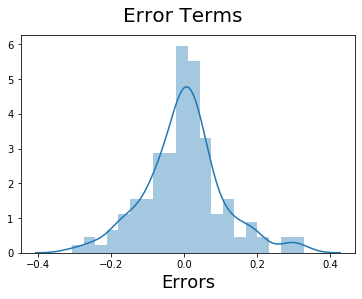

In [59]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Error terms are quite appr. normally distributed and centered around zero. Hence we are good on terms with assumption for error terms.

### Step 8: Making Predictions Using the Final Model

In [60]:
# From test set we need to transform the all numerical feature

num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [61]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_maxda,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porcshce,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.822581,0.435484,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.016129,0.274194,0.177419,0.241935,0.145161,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.0,0.064516,0.016129,0.064516,0.064516,0.048387,0.048387,0.016129,0.016129,0.0,0.048387,0.016129,0.193548,0.080645,0.080645,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.127000,0.449749,0.385142,0.431751,0.355139,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.0,0.247676,0.127000,0.247676,0.247676,0.216335,0.216335,0.127000,0.127000,0.0,0.216335,0.127000,0.398304,0.274512,0.274512,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.

In [62]:
X_train_new.columns

Index(['boreratio', 'CarName_bmw', 'enginetype_rotor', 'cylindernumber_four',
       'cylindernumber_twelve'],
      dtype='object')

In [63]:
# Dividing into X_test and y_test

y_test = df_test.pop('price')
X_test = df_test

In [64]:
# select only significant columns as found in model 11 from for train data set

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [65]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

### Step 9 : Model Evolution

[]

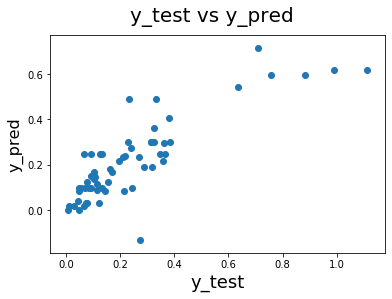

In [66]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 
plt.plot()

There are few outliers seen but most of the test data have linear spread

In [67]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred)

0.6936497240078521

We can see that the equation of our best fitted line is:

$ Price = 0.4406*boreratio + 0.3256*cylindernumber_twelve + 0.1584*CarName_bmw - 0.2358*enginetype_rotor - 0.3092*cylindernumber_four $
